# TASK-2 Prediction using Unsupervised ML

**NAME** : S.HARIHARA SUDHAN

**Problem Statement**: From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

**What is Unsupervised Learning?**:Unsupervised learning is a type of machine learning in which models are trained using unlabeled dataset and are allowed to act on that data without any supervision.

**Dataset**:https://bit.ly/3kXTdox


# 1. Importing and Loading Data

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
#Importing data
df=pd.read_csv(r'C:\Users\hp\Downloads\Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Checking the distribution of the target class
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [7]:
from IPython.display import Image
Image(url='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png', width=600)

In [8]:
#Descriptive Statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<function matplotlib.pyplot.show(*args, **kw)>

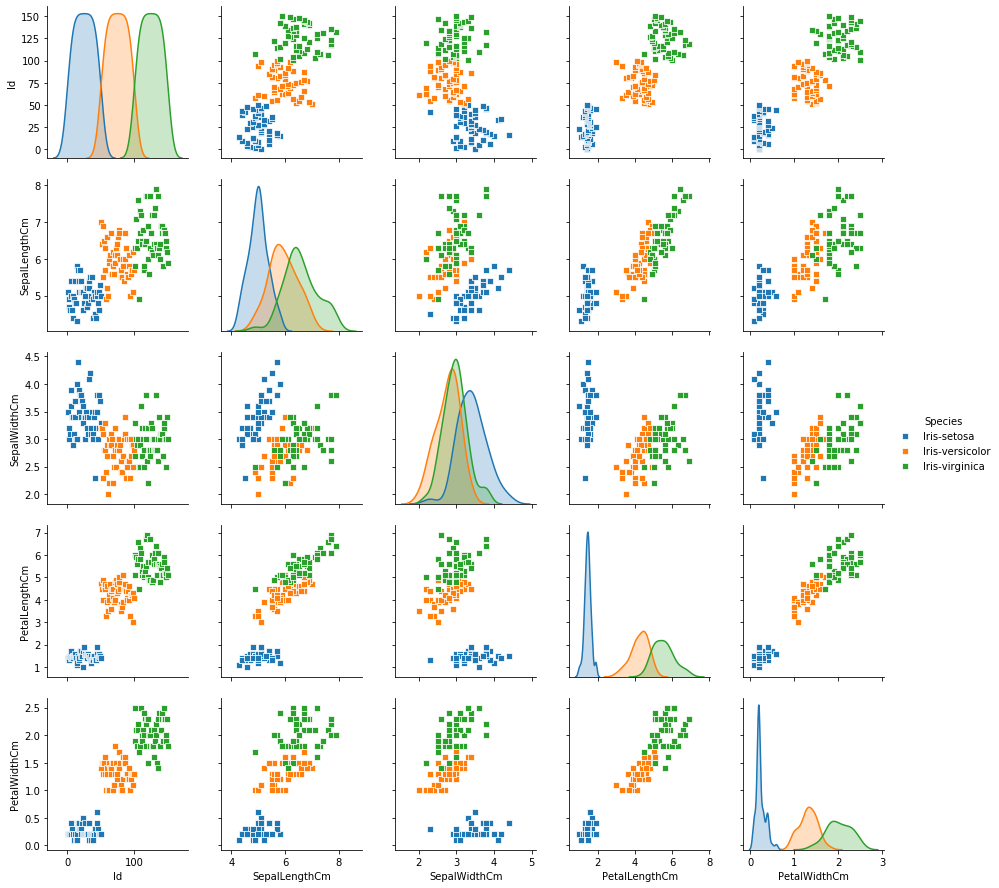

In [10]:
#Visulaizing the relationship between different columns
sns.pairplot(df,hue='Species',markers='s')
plt.show()

In [15]:
df.drop("Id",inplace=True,axis=1)
df.drop("Species",inplace=True,axis=1)

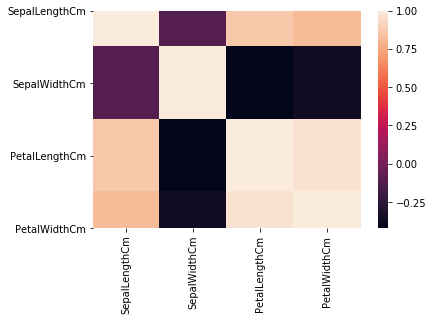

In [16]:
#Correlation between each column
sns.heatmap(df.corr())

# Calculating the within cluster sum of square

In [22]:
#Calculating the within cluster sum of square
within_cluster_sum_of_square=[]
x=df.iloc[:,[0,1,2,3]].values
#Defining the range of clusters
clusters_range = range(1,15)
for i in clusters_range:
    km = KMeans(n_clusters=i)
    km = km.fit(df)
    within_cluster_sum_of_square.append(km.inertia_)


<function matplotlib.pyplot.show(*args, **kw)>

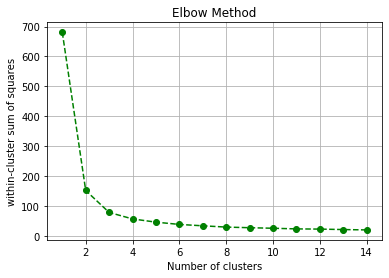

In [24]:
#Plotting the within cluster sum of square vs cluster range
plt.plot(clusters_range,within_cluster_sum_of_square,'go--',color='g')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('within-cluster sum of squares')
plt.grid()
plt.show

# Applying KMeans Clustering the data

In [25]:
#Applying KMeans Clustering the data
model=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
predictions=model.fit_predict(df)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

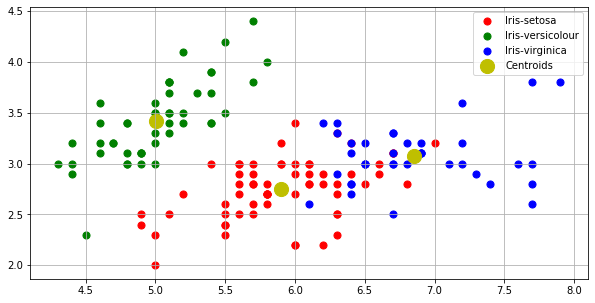

In [29]:
#Visualize the data
plt.figure(figsize=(10,5))
plt.scatter(x[predictions==0,0],x[predictions==0,1],s=50,color='r',label='Iris-setosa')
plt.scatter(x[predictions==1,0],x[predictions==1,1],s=50,color='g',label='Iris-versicolour')
plt.scatter(x[predictions==2,0],x[predictions==2,1],s=50,color='b',label='Iris-virginica')
#Plotting the clusters centers
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=200,color='y',label='Centroids')
plt.grid()
plt.legend()
plt.show()
